In [ ]:
import os
import random
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, Lasso
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("SpotifyFeatures.csv")

In [3]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
#keep only the genres we are interested in by dropping all the others
olataeidi=df['genre'].unique().tolist()
autathelw=['Hip-Hop', 'Ska', 'Classical']
for eidos in olataeidi:
    if eidos not in autathelw:
        df = df.drop(df[df.genre==eidos].index)
#reset indexes 
df=df.reset_index(drop=True)

In [5]:
# drop the features we don't need
df = df.drop(columns='artist_name', axis=1)
df = df.drop(columns='track_name', axis=1)


#delete nulls if they exist
df = df.dropna(how='any',axis=0)

#replace strings with actual numbers in features "mode" and "key"
skala = {'Major' : 1, 'Minor' : 0}
kleidi = {'C' : 1, 'C#' : 2, 'D' : 3, 'D#' : 4, 'E' : 5, 'F' : 6, 
        'F#' : 7, 'G' : 8, 'G#' : 9, 'A' : 10, 'A#' : 11, 'B' : 12}
df['mode'].replace(skala, inplace=True)
df['key'].replace(kleidi, inplace=True)

#remove the denominator from the feature "time_signature"
metra=0
for kati in df['time_signature']:
    if kati==('4/4'):
        df['time_signature'][metra]=4
    elif kati==('5/4'):
        df['time_signature'][metra]=5
    elif kati==('3/4'):
        df['time_signature'][metra]=3
    elif kati==('1/4'):
        df['time_signature'][metra]=1
    metra+=1
    
#replace class names with integers
tieinai = {'Hip-Hop' : 1, 'Ska' : 0, 'Classical':2}
df['genre'].replace(tieinai, inplace=True)

<ipython-input-5-8f0bc1173f62>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_signature'][metra]=4
<ipython-input-5-8f0bc1173f62>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_signature'][metra]=3
<ipython-input-5-8f0bc1173f62>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_signature'][metra]=5
<ipython-input-5-8f0bc1173f62>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [6]:
#check for duplicates
exeiaragedipla=df.duplicated(subset='track_id', keep='first')
exei=0
for kati in exeiaragedipla:
    if kati is True:
        exei+=1
print (exei)

#no duplicates found so now we can drop the 'track_id' feature

0


In [7]:
df = df.drop(columns='track_id', axis=1)

In [8]:
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,96,0.14900,0.837,213594,0.364,0.00000,9,0.2710,-11.713,1,0.2760,123.984,4,0.463
1,1,95,0.25900,0.889,180522,0.496,0.00000,5,0.2520,-6.365,0,0.0905,86.003,4,0.544
2,1,93,0.03950,0.837,288624,0.636,0.00125,2,0.3420,-7.643,1,0.0860,145.972,4,0.274
3,1,88,0.00195,0.942,177806,0.383,0.00000,11,0.0922,-8.099,1,0.5650,100.021,4,0.380
4,1,92,0.19400,0.729,183907,0.625,0.00986,5,0.2480,-5.266,1,0.0315,146.034,4,0.261


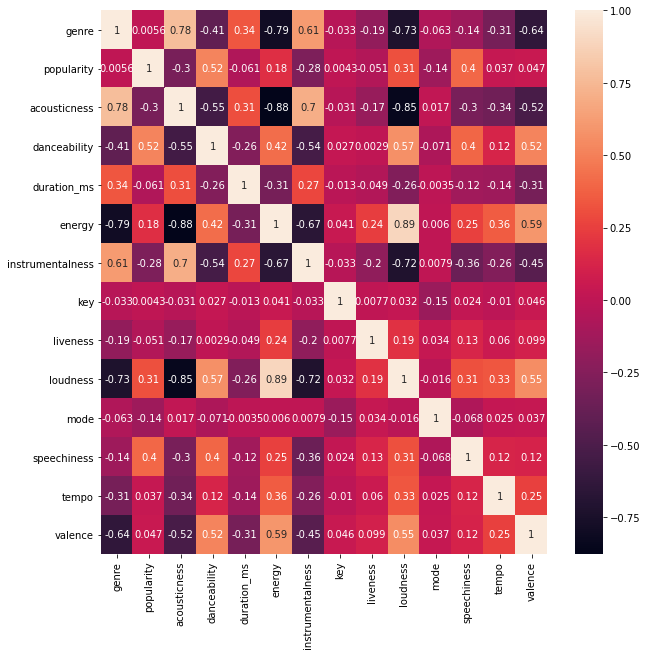

In [9]:
#make heatmap 
fig, ax = plt.subplots(figsize=(10,10))
heatmap = sb.heatmap(df.corr(),  annot=True, ax=ax)

In [10]:
#looking at the heatmap and after running some classifiers we see that it's better to drop the 'key' feature
df = df.drop(columns='key', axis=1)

In [11]:
#count samples for each class to make sure that the dataset is balanced
posa1=0
posa0=0
posa2=0
for i in range(len(df['genre'])):
    if df['genre'][i]==1:
        posa1+=1
    elif df['genre'][i]==0:
        posa0+=1
    elif df['genre'][i]==2:
        posa2+=1
print(posa1)
print(posa0)
print(posa2)

9295
8874
9256


In [12]:
#def to plot confusion matrix for multiclass
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_test, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax

In [13]:
#def to plot learning curves
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
 
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    pipe = Pipeline([("scale", StandardScaler()),
                 ("estimator", estimator)
                ])
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(pipe, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [14]:
#separate the genre, and set train and test sets and scale them
X=np.array(df.drop(['genre'], axis=1))
y = np.array(df['genre'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2658
           1       0.97      0.98      0.97      2748
           2       0.99      0.95      0.97      2822

    accuracy                           0.96      8228
   macro avg       0.96      0.96      0.96      8228
weighted avg       0.96      0.96      0.96      8228



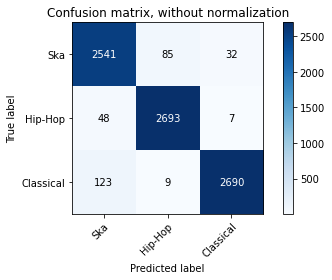

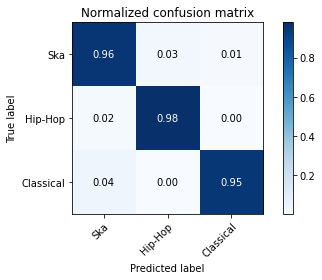

Cross-validation
F1_micro = 0.9533647626738528
F1_macro = 0.9529403237343193
Accuracy = 0.9533647626738528


In [15]:
clf = svm.SVC(C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


np.set_printoptions(precision=2)
class_names = np.array(['Ska', 'Hip-Hop', 'Classical'])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


#cross-validation
pipe = Pipeline([("scale", StandardScaler()),
                 ("clf", svm.SVC(C=1.0))
                ])

scoring = ['f1_micro','f1_macro' ,'accuracy']
scores = cross_validate(pipe, X, y, cv=4, scoring=scoring, return_train_score=True)
telika=[sum(scores['test_f1_micro'])/4, sum(scores['test_f1_macro'])/4, sum(scores['test_accuracy'])/4]
print('Cross-validation')
print('F1_micro =', telika[0])
print('F1_macro =', telika[1])
print('Accuracy =', telika[2])

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2658
           1       0.96      0.98      0.97      2748
           2       0.99      0.96      0.97      2822

    accuracy                           0.96      8228
   macro avg       0.96      0.96      0.96      8228
weighted avg       0.96      0.96      0.96      8228



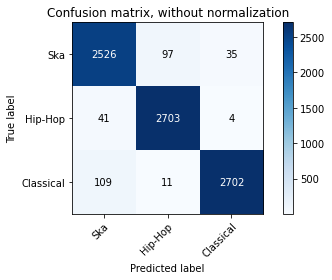

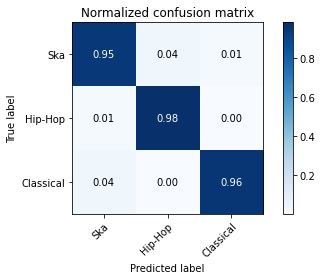

Cross-validation
F1_micro = 0.9404565420800894
F1_macro = 0.940078588862389
Accuracy = 0.9404565420800894


In [16]:
rfc = RandomForestClassifier(n_estimators=100, random_state=45)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))


np.set_printoptions(precision=2)
class_names = np.array(['Ska', 'Hip-Hop', 'Classical'])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


#cross-validation
pipe = Pipeline([("scale", StandardScaler()),
                 ("rfc", RandomForestClassifier(n_estimators=30, random_state=42))
                ])

scoring = ['f1_micro','f1_macro' ,'accuracy']
scores = cross_validate(pipe, X, y, cv=4, scoring=scoring, return_train_score=True)
telika=[sum(scores['test_f1_micro'])/4, sum(scores['test_f1_macro'])/4, sum(scores['test_accuracy'])/4]
print('Cross-validation')
print('F1_micro =', telika[0])
print('F1_macro =', telika[1])
print('Accuracy =', telika[2])

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2658
           1       0.96      0.97      0.97      2748
           2       0.98      0.96      0.97      2822

    accuracy                           0.96      8228
   macro avg       0.96      0.96      0.96      8228
weighted avg       0.96      0.96      0.96      8228



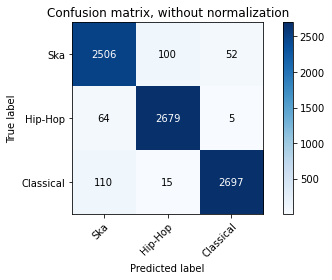

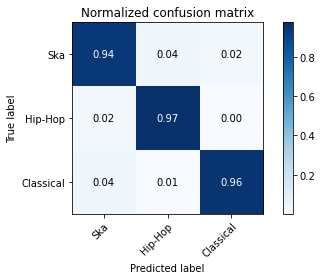

Cross-validation
F1_micro = 0.9493901897642607
F1_macro = 0.9487563818005965
Accuracy = 0.9493901897642607


In [17]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))


np.set_printoptions(precision=2)
class_names = np.array(['Ska', 'Hip-Hop', 'Classical'])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

#cross-validation
pipe = Pipeline([("scale", StandardScaler()),
                 ("knn", KNeighborsClassifier(n_neighbors=5))
                ])

scoring = ['f1_micro','f1_macro' ,'accuracy']
scores = cross_validate(pipe, X, y, cv=4, scoring=scoring, return_train_score=True)
telika=[sum(scores['test_f1_micro'])/4, sum(scores['test_f1_macro'])/4, sum(scores['test_accuracy'])/4]
print('Cross-validation')
print('F1_micro =', telika[0])
print('F1_macro =', telika[1])
print('Accuracy =', telika[2])

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2658
           1       0.92      0.97      0.95      2748
           2       0.97      0.92      0.95      2822

    accuracy                           0.94      8228
   macro avg       0.94      0.93      0.93      8228
weighted avg       0.94      0.94      0.94      8228



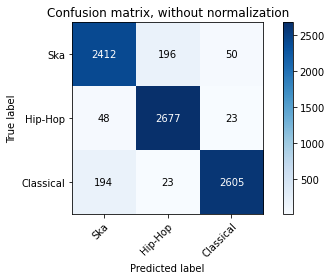

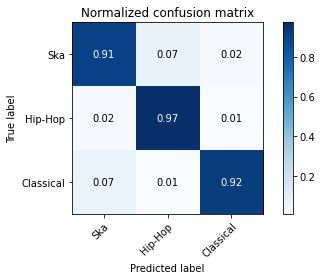

Cross-validation
F1_micro = 0.9300282311222304
F1_macro = 0.9295078188851085
Accuracy = 0.9300282311222304


In [18]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))


np.set_printoptions(precision=2)
class_names = np.array(['Ska', 'Hip-Hop', 'Classical'])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()



#cross-validation
pipe = Pipeline([("scale", StandardScaler()),
                 ("gnb", GaussianNB())
                ])

scoring = ['f1_micro','f1_macro' ,'accuracy']
scores = cross_validate(pipe, X, y, cv=4, scoring=scoring, return_train_score=True)
telika=[sum(scores['test_f1_micro'])/4, sum(scores['test_f1_macro'])/4, sum(scores['test_accuracy'])/4]
print('Cross-validation')
print('F1_micro =', telika[0])
print('F1_macro =', telika[1])
print('Accuracy =', telika[2])

<module 'matplotlib.pyplot' from 'c:\\users\\destr\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

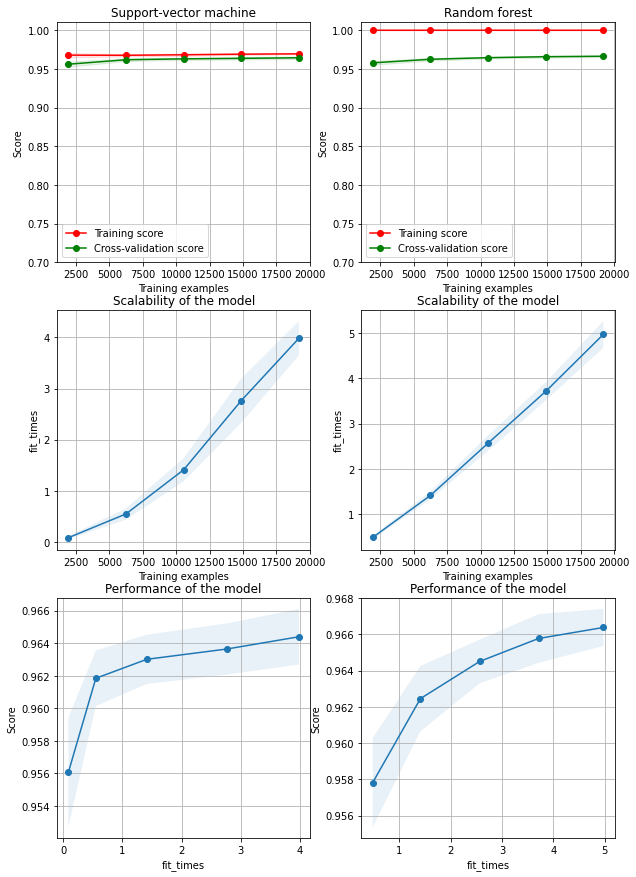

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
cv = ShuffleSplit(n_splits=10, test_size=0.30, random_state=0)
plot_learning_curve(clf, "Support-vector machine", X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=3)

plot_learning_curve(rfc, "Random forest", X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=2)

<module 'matplotlib.pyplot' from 'c:\\users\\destr\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

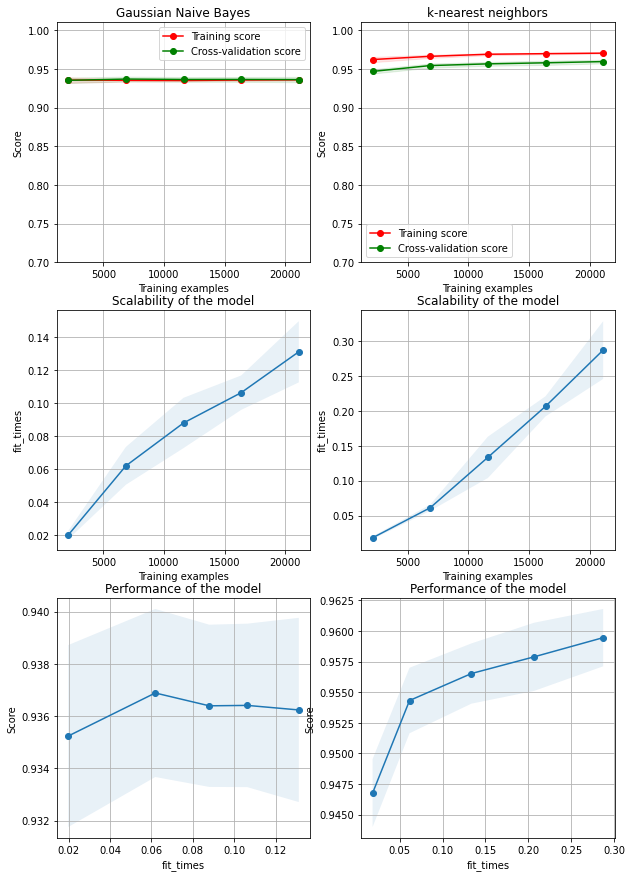

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
cv = ShuffleSplit(n_splits=10, test_size=0.23, random_state=0)
plot_learning_curve(gnb, "Gaussian Naive Bayes", X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=3)

plot_learning_curve(knn, "k-nearest neighbors", X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=2)

In [ ]:
#tune the RandomForestClassifier

grid_RF = [{'RF__criterion':['gini','entropy'],
            'RF__n_estimators': [100,110,120,130],
            'RF__max_features':['auto','sqrt',0.2,0.4],
            'RF__min_samples_split':[2,5,8,10,12]}]

estimators_RF = [('imputation',KNNImputer(n_neighbors=5)),
                 ('scale', StandardScaler()),
                 ('RF',RandomForestClassifier())
                 ]
pipeline_RF = Pipeline(estimators_RF)
kfold = StratifiedKFold(n_splits=5)
grid_search_RF = GridSearchCV(pipeline_RF, grid_RF,scoring='f1',cv=kfold)
grid_search_RF.fit(X_train,y_train.ravel())
print(grid_search_RF.best_params_)

#outcome: default values
#{'RF__criterion': 'gini', 'RF__max_features': 'auto', 'RF__min_samples_split': 2, 'RF__n_estimators': 100}

In [ ]:
#tune SVM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #for finding missing values and replace tham with whatever i define
from sklearn.svm import SVC
from numpy import unique
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# summarize dataset
classes = unique(y)
total = len(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
classes_y_train = unique(y_train)
total_y_train = len(y_train)
for c in classes_y_train:
    n_examples = len(y_train[y_train==c])
    percent = n_examples / total_y_train * 100
    print('> Class=%d in train: %d/%d (%.1f%%)' % (c, n_examples, total_y_train, percent))
 
classes_y_test = unique(y_test)
total_y_test = len(y_test)
for c in classes_y_test:
    n_examples = len(y_test[y_test==c])
    percent = n_examples / total_y_test * 100
    print('> Class=%d in test: %d/%d (%.1f%%)' % (c, n_examples, total_y_test, percent))
#define the steps of the pipeline for train-validation dataset
estimators_svm = [('imputer', SimpleImputer(strategy='mean')),
             ('scale', StandardScaler()),
               ('svc', SVC())]
estimators_dt = [('imputer', SimpleImputer(strategy='mean')),
             ('scale', StandardScaler()),
               ('svc', SVC())]
#define grid params  
grid_svm = [{'svc__kernel': ['rbf','linear'],
         'svc__gamma': ['scale','auto',0.1,1,10],
         'svc__C':[0.1,1,10,20,30,40]}]
pipeline_svm = Pipeline(steps=estimators_svm)
kfold = StratifiedKFold(n_splits=4)
grid_search_svm = GridSearchCV(pipeline_svm, grid_svm,cv=kfold,scoring='f1')
grid_search_svm.fit(X_train,y_train.ravel()) 
print(grid_search_svm.best_params_)

#outcome: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
# that is, C=0.1 and the rest the default values